# Regression practice with Nerural Network:
## Process:
    1. Import data
    2. Data Procesing
        # Normalization
        # One hot encoding
        # train test split
    3. Build the model
        # Neural Network
          - 3 Dense layers (100, 10, 1)
          - optimizer: Adam
          - epochs: 100
    4. Predict
    5. Evaluation
    6. Paramater Tuning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
insurance = pd.read_csv('./insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing
Process:

    * Build a column transformer model: and select models for normalization, encoding or other other type of preprocessing you need
    * Create X & y: seperate features and label from data
    * Build the train test sets
    * Fit The column transformer to our data (Normalization and encoding)
    * Transform the training and test data with normalization

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer model
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn the values in these list between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit The column transformer model to our data range
ct.fit(X_train)

# Transform the training and test data 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [4]:
X_train.min(), X_test.min()

(age                18
 sex            female
 bmi             15.96
 children            0
 smoker             no
 region      northeast
 dtype: object,
 age                18
 sex            female
 bmi            16.815
 children            0
 smoker             no
 region      northeast
 dtype: object)

In [5]:
X_train.max(), X_test.max()

(age                64
 sex              male
 bmi             53.13
 children            5
 smoker            yes
 region      southwest
 dtype: object,
 age                64
 sex              male
 bmi             52.58
 children            5
 smoker            yes
 region      southwest
 dtype: object)

**Note:** Here I got curious, what would happen if we fit normalization model with X_train but there is different min/max value lower/higher in X_test than we have in X_train, will it affect our normalization?
   
   -> And I found that "fitting the ColumnTransformer with the entire dataset X (including both training and test data) can potentially lead to information leakage from the test set into the preprocessing steps. This can result in overly optimistic performance estimates during model evaluation and can lead to misleading results." - chatGPT 
   
so, I plan to go with X_train ->#

In [6]:
X_train, X_train_normal

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

In [7]:
# Build a neural network model 

# set random seed
tf.random.set_seed(42)

# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

2023-07-01 13:17:22.433792: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Text(0.5, 0, 'epochs')

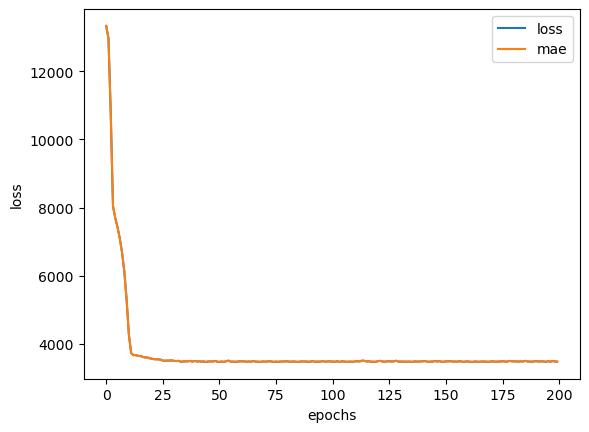

In [8]:
# plot the history : training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [9]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
# evaluate the model
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3172.4009 - mae: 3172.4009


[3172.40087890625, 3172.40087890625]

In [11]:
y_pred = insurance_model.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


In [12]:
y_pred

array([[ 9465.003  ],
       [ 6178.8438 ],
       [44746.836  ],
       [ 9415.115  ],
       [32654.113  ],
       [ 5850.869  ],
       [ 1323.6382 ],
       [13546.3545 ],
       [ 3786.0176 ],
       [10348.518  ],
       [36026.957  ],
       [ 7917.55   ],
       [ 4423.801  ],
       [41219.14   ],
       [43649.086  ],
       [40919.78   ],
       [10740.1045 ],
       [40825.406  ],
       [ 8851.474  ],
       [39187.438  ],
       [ 4181.831  ],
       [ 8149.5244 ],
       [  886.12024],
       [ 3261.8403 ],
       [11004.029  ],
       [11396.522  ],
       [12380.059  ],
       [ 5022.9346 ],
       [10061.826  ],
       [  717.10205],
       [ 8422.884  ],
       [11823.558  ],
       [ 2152.5967 ],
       [ 5323.1924 ],
       [ 3123.2556 ],
       [ 8932.983  ],
       [ 2047.1483 ],
       [ 8036.714  ],
       [41842.73   ],
       [37428.027  ],
       [ 3233.3086 ],
       [ 2520.6326 ],
       [11757.122  ],
       [11634.448  ],
       [ 5759.089  ],
       [11

In [13]:
# mae & mse
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3172.4006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43494350.0>)

In [14]:
# fit the model
history2 = insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 3492.5806 - mae: 3492.5806
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 3483.8000 - mae: 3483.8000
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 3480.9326 - mae: 3480.9326
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 3486.5679 - mae: 3486.5679
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 3480.1560 - mae: 3480.1560
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 3500.7559 - mae: 3500.7559
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 3483.8345 - mae: 3483.8345
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 3487.4800 - mae: 3487.4800
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 3485.7236 - mae: 3485.7236
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 3489.8408 - mae: 3489.8408

<Axes: >

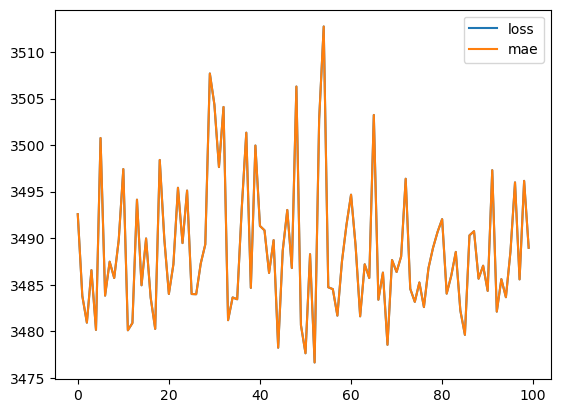

In [15]:
pd.DataFrame(history2.history).plot()

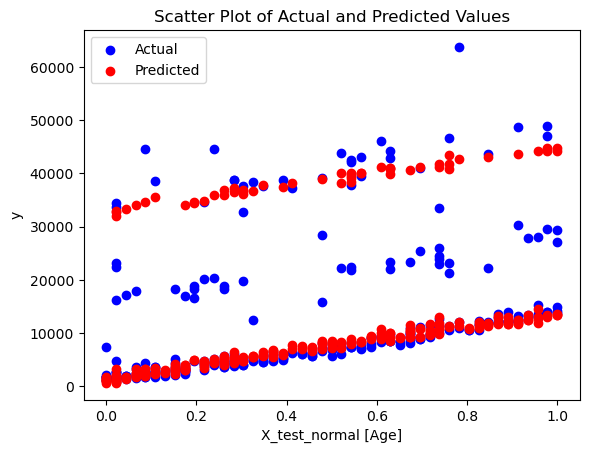

In [19]:
# Scatter plot of actual values (y_test) in blue
plt.scatter(X_test_normal[:, 0], y_test, color='blue', label='Actual')

# Scatter plot of predicted values (y_pred) in red
plt.scatter(X_test_normal[:, 0], y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('X_test_normal [Age]')
plt.ylabel('y')
plt.title('Scatter Plot of Actual and Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()